In [49]:
# import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [50]:
# đọc dữ liệu
df = pd.read_csv('GDPlist1.csv')
df.head()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


#### Kiểm định Trung bình GDP của các quốc gia trên thế giới là 500 tỉ usd/năm

In [51]:
df.describe()

,GDP (millions of US$)
count,1.250000e+02
mean,5.554278e+05
std,1.649266e+06
min,1.060000e+04
25%,2.574200e+04
50%,9.608900e+04
75%,3.332380e+05
max,1.509402e+07


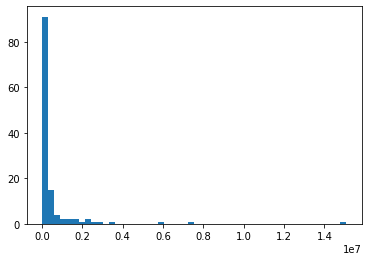

In [52]:
plt.hist(df['GDP (millions of US$)'], bins=50);

##### Thực hiện kiểm định 2 phía 
##### Giả thuyết không: GDP trung bình = 500
##### Giả thuyết đối: GDP trung bình # 500

In [53]:
print( stats.ttest_1samp(df['GDP (millions of US$)'], 500))

Ttest_1sampResult(statistic=3.7618446272211066, pvalue=0.0002588173871939586)


In [54]:
# kiếm định phải
#print( stats.ttest_1samp(df['GDP (millions of US$)'], 500, alternative='greater'))

In [55]:
# kiểm định trái
#print( stats.ttest_1samp(df['GDP (millions of US$)'], 500, alternative='less'))

In [ ]:
# Giá trị pvalue << 5% nên ta bác bỏ luôn giả thuyết không
# Kết luận: Với mức ý nghĩa 5% của GDP thì có thể xác định GDP trung bình các quốc gia trên thế giới khác 500 tỉ USD

#### Kiểm định GDP trung bình ở các quốc gia ở châu Âu cao hơn châu Á không

In [56]:
df.columns

Index(['Country', 'Continent', 'GDP (millions of US$)'], dtype='object')

In [57]:
df['Continent'].value_counts()

Europe           37
Asia             36
Africa           29
North America    11
South America     9
Oceania           3
Name: Continent, dtype: int64

In [58]:
df_Europe = df[df['Continent'] == 'Europe']
df_Asia = df[df['Continent'] == 'Asia']
print('GDP trung bình của châu Âu', df_Europe['GDP (millions of US$)'].mean())
print('GDP trung bình của châu Á' , df_Asia['GDP (millions of US$)'].mean())

GDP trung bình của châu Âu 517280.54054054053
GDP trung bình của châu Á 678496.9722222222


In [61]:
print (stats.ttest_ind(df_Europe['GDP (millions of US$)'], df_Asia['GDP (millions of US$)'],equal_var=False,alternative='greater'))

Ttest_indResult(statistic=-0.5546583491057376, pvalue=0.7093061297701153)


In [ ]:
# Chúng ta nhìn thấy rằng: pvalue > 5% rất nhiều nên không đủ cơ sở để bác bỏ giả thuyết không 
# Kết luận: Không đủ căn cứ để kết luận rằng GDP trung bình Châu Âu cao hơn Châu Á

#### Kiểm định GDP trung bình của các quốc gia ở châu Âu và châu Mỹ là bằng nhau

In [69]:
df_America = df[(df['Continent']=='North America') | (df['Continent']=='South America')]
df_America.mean()

GDP (millions of US$)    1118983.2
dtype: float64

#### So sánh trung bình độc lập – independent T test Giả thuyết không: GDP trung bình châu Âu và châu Mỹ bằng nhau, Giả thuyết đối: GDP trung bình châu Âu và châu Mỹ khác nhau

In [75]:
print(stats.ttest_ind(df_America['GDP (millions of US$)'], df_Europe['GDP (millions of US$)'], equal_var=False,alternative='two-sided'))

Ttest_indResult(statistic=0.7882914270473153, pvalue=0.43961393931830917)


In [ ]:
# P >> 5% nhưng kết quả thực sự lại là khác nhau, có vấn đề